<a href="https://colab.research.google.com/github/AndressaRodrigues/Portifolio/blob/main/Uma_breve_an%C3%A1lise_amostral_sobre_dados_do_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Como a situação socioeconômica impacta no desempenho

Eu optei por fazer uma análise descritiva da amostra dos dados do ENEM 2019, que foi oferecida pela Alura na sua Imersão Dados 2.
Porquê uma análise descritiva?
Achei justo investigar agulns fatores socio-econômicos que podem impactar no desempenho dos candidatos, tais como: gênero, número de quartos (tentando determinar se a existência de mais espeaço em casa pode impactar no tempo de estudo), renda, nível de escolaridade dos pais.


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

In [ ]:
dados.columns.values

In [ ]:
#criandos a soma total das notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

In [ ]:
#separando alguns dados
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")


##Comparação de desempenho por renda
Uma das primeiras perguntas que aparecem quando se tenta abordar se as condições socio-ecônomicas impactam no desempenho é se candidatos com renda familar maior vão melhor. Inclusive durante a Imersão este foi um dos gráficos gerados. Vou transcrevê-lo para assim prosseguir com minha análise.

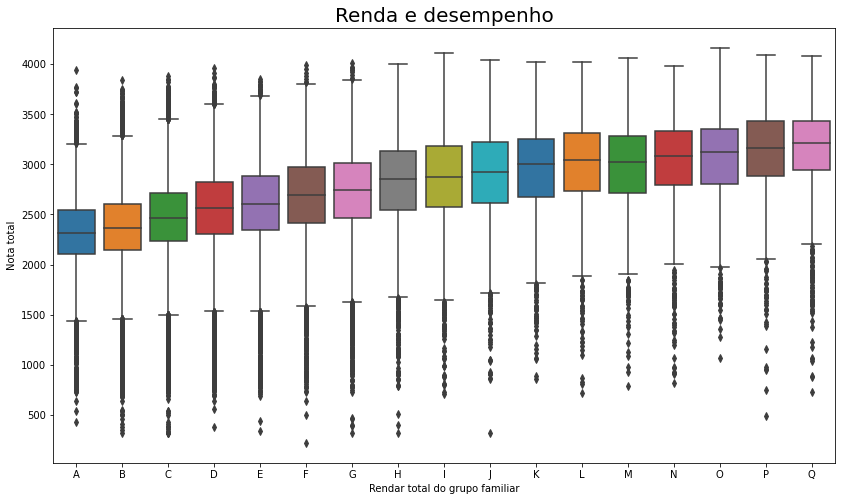

In [ ]:
plt.figure(figsize=(14, 8))
b = sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL",data =dados_sem_notas_zero, order = renda_ordenada, palette = "tab10").set(title = "" ,xlabel = "Rendar total do grupo familiar", ylabel = "Nota total")
plt.title(label = "Renda e desempenho", fontsize = 20)    

sns.set_theme(style="white")

É possível notar que a mediana do desempenho aumenta de valor conforme a renda aumenta, sendo que legenda para as variáveis da imagem é:

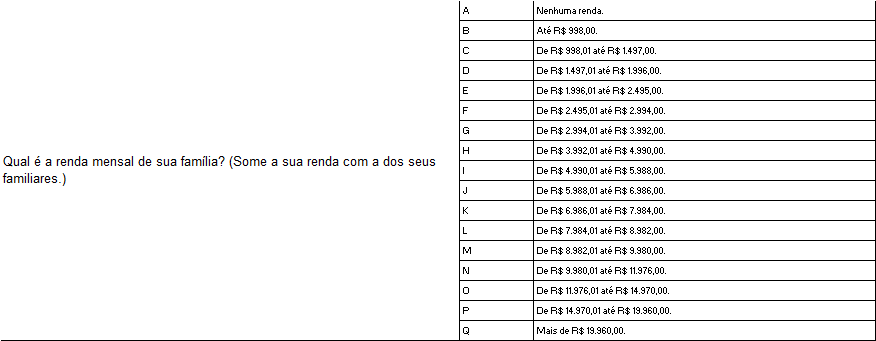

##O nível de escolaridade dos pais reflete no desempenho do candidato?
Sabendo que o nível de educação dos pais reflete na renda futura dos filhos (fonte: https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/9472-pnad-2014-nivel-de-escolarizacao-dos-pais-influencia-rendimento-dos-filhos), eu decidi cruzar os dados de escolaridade da família e desempenho na prova.

In [ ]:
estudo_pai_order = dados["Q001"].unique()
estudo_pai_order.sort()

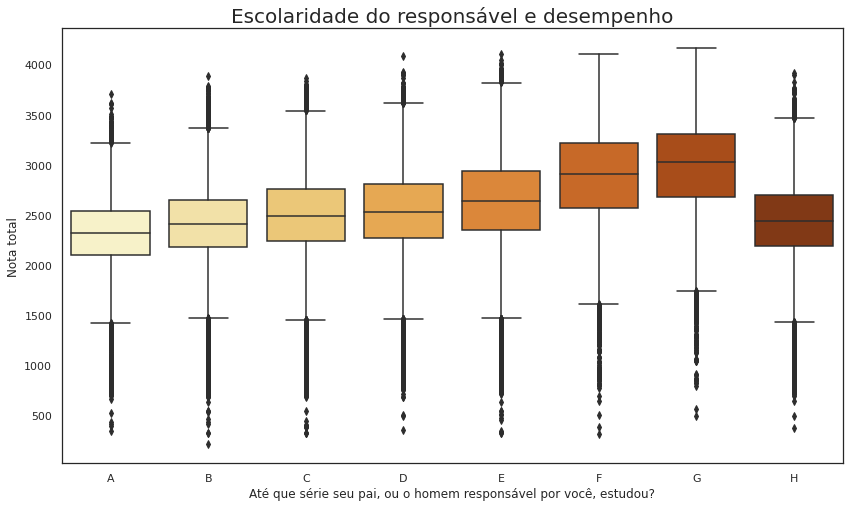

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = "Q001", y = "NU_NOTA_TOTAL",data =dados_sem_notas_zero, order = estudo_pai_order,palette = "YlOrBr").set(title = "",xlabel = "Até que série seu pai, ou o homem responsável por você, estudou?", ylabel = "Nota total")
plt.title(label = "Escolaridade do responsável e desempenho", fontsize = 20)  
sns.set_theme(style="white")

Sendo a legenda das categorias do eixo X a seguinte:

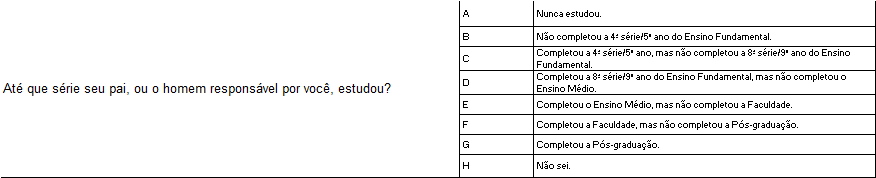


Podemos ver que há uma relação entre a nota tirada e o nível de escolaridade do pai ou responsável.

In [ ]:
estudo_mae_order = dados["Q002"].unique()
estudo_mae_order.sort()

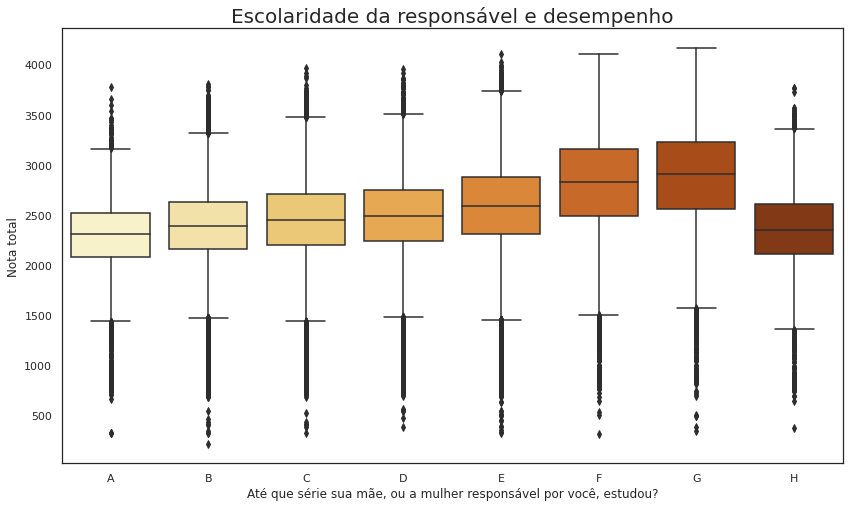

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = "Q002", y = "NU_NOTA_TOTAL",data =dados_sem_notas_zero, order = estudo_mae_order,palette = "YlOrBr").set(title = "", xlabel = "Até que série sua mãe, ou a mulher responsável por você, estudou?", ylabel = "Nota total")
plt.title(label = "Escolaridade da responsável e desempenho", fontsize = 20)  
sns.set_theme(style="white")

Como a legenda das categorias das duas perguntas é a mesma, achei desnecessário repetir.

Mas é possível notar que conforme os responsáveis do candidato tem mais anos de estudo, melhor eles vão nas provas. Corroborando o dado inicial, mas também mostrando que se qualquer um dos responsáveis tem graduação ou pós graduação, melhor o candidato irá na prova. A coluna H é a exceção, e mostra em ambos gráficos, que quem não soube informar a escolaridade tem desempenho muito próximo de quem tem responsáveis que nunca estudaram. 

In [ ]:
#desempenho por escolaridade dos responsáveis. Dados para argumentação
des_sem_e_pai = dados.query("Q001 == 'A'")["NU_NOTA_TOTAL"].median()
des_grad_pai = dados.query("Q001 == 'F' or Q001 == 'G'")["NU_NOTA_TOTAL"].quantile(0.25)

print(des_grad_pai, "responsável com graduação +")
print(des_grad_pai, "responsável sem estudo")

2361.1 responsável com graduação +
2361.1 responsável sem estudo


## Outros aspectos socio-econômicos

**Quantidade de quartos**

Sabendo por experiência prória que as pessoas constumam mentir sobre a renda, mas nem tanto sobre a quantidade de quartos, decidi relacionar as variáveis de quantidade de quartos para dormir e nota total. Pessoas de renda mais alta moram que casas maiores, isso possibilita ter uma espaço para estudar sem distrações.

In [ ]:
quartos_order = dados["Q009"].unique()
quartos_order.sort()

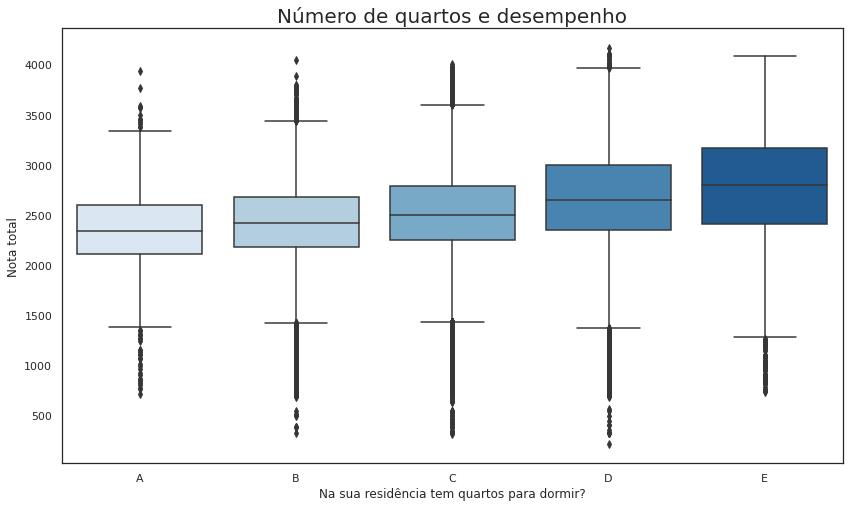

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = "Q009", y = "NU_NOTA_TOTAL",data =dados_sem_notas_zero, order = quartos_order,palette = "Blues").set(title = "", xlabel = "Na sua residência tem quartos para dormir?", ylabel = "Nota total")
plt.title(label = "Número de quartos e desempenho", fontsize = 20)  
sns.set_theme(style="white")

Legenda das categorias:

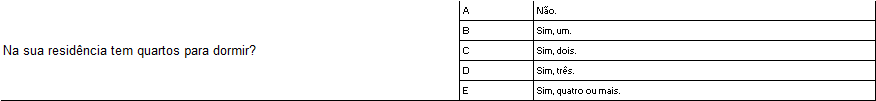

In [ ]:
#verificando a quantidade de candidatos em algumas categorias

quartos_sem_med = dados.query("Q009 == 'A'")["NU_NOTA_TOTAL"].median()
quartos_1_ou_mais_med = dados.query("Q009 != 'A'")["NU_NOTA_TOTAL"].median()
quartos_4_ou_mais_75 = dados.query("Q009 == 'E'")["NU_NOTA_TOTAL"].quantile(0.25)

quartos_sem = dados.query("Q009 == 'A'")["NU_NOTA_TOTAL"]
quartos_1_ou_mais = dados.query("Q009 != 'A'")["NU_NOTA_TOTAL"]
quartos_4_ou_mais = dados.query("Q009 == 'E'")["NU_NOTA_TOTAL"]


print(len(quartos_sem), "candidatos declararam não ter quartos")
print(len(quartos_1_ou_mais), "candidatos declararam ter 1 ou mais quartos")
print(len(quartos_4_ou_mais), "candidatos declararam ter 4 ou mais quartos")

print(quartos_sem_med, "mediana das notas de quem não tem quartos")
print(quartos_1_ou_mais_med, "mediana das notas de quem tem 1 ou mais quartos")
print(quartos_4_ou_mais_75, "75% maiores notas de quem tem 4 ou mais quartos")

1069 candidatos declararam não ter quartos
126311 candidatos declararam ter 1 ou mais quartos
6257 candidatos declararam ter 4 ou mais quartos
2129.3 mediana das notas de quem não tem quartos
2387.7 mediana das notas de quem tem 1 ou mais quartos
2119.9 75% maiores notas de quem tem 4 ou mais quartos


Ainda que correlação não implique em casualidade, é possível ver que conforme a quantidade de quartos aumenta, o desempenho melhora.

E 75% das notas de quem declarou ter 4 ou mais quartos são melhores, ou iguais, a mediana de quem não tem quartos.

**Empregados**

Outra questão interessante de investigar foi a nota total de quem tinha empregados ou não.

Sendo poder pagar empregados um indicativo de renda. 

In [ ]:
empregados_order = dados["Q007"].unique()
empregados_order.sort()


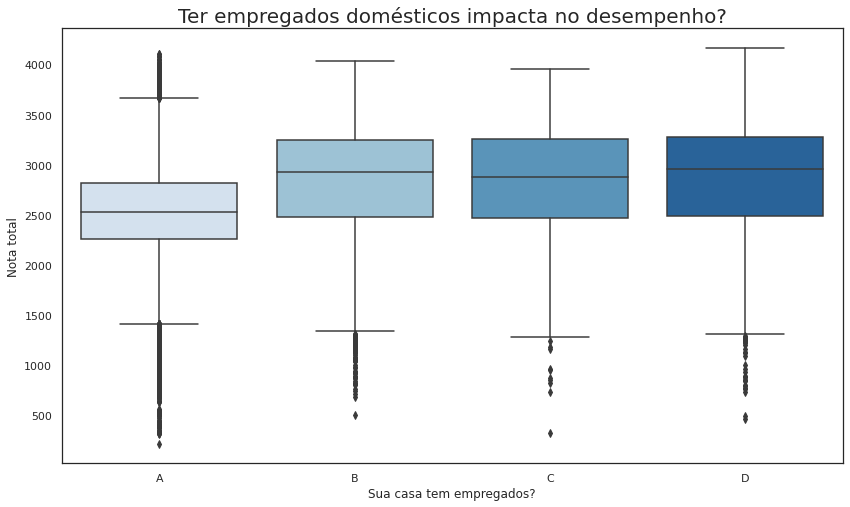

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = "Q007", y = "NU_NOTA_TOTAL",data =dados_sem_notas_zero, order = empregados_order,palette = "Blues").set(title = "" ,xlabel = "Sua casa tem empregados?", ylabel = "Nota total")
plt.title(label = "Ter empregados domésticos impacta no desempenho?", fontsize = 20)
sns.set_theme(style="white")

A legenda das categorias é:

A = Sem empregados domésticos

B = Empregados em 1 ou 3 dias

C = Empregados em 3 ou 4 dias

D = Empregados em 5 ou mais dias


Vale destacar 50% de que quem tem um empregado que trabalha na sua casa por pelo menos 5 dias tirou mais de 2800 pontos na soma das notas. (segue o valor da mediana na célula abaixo)

In [ ]:
#mediana das notas de quem tem empregado doméstico por 5 dias ou mais durante a semana
dados.query("Q007 == 'D'")["NU_NOTA_TOTAL"].median()


2806.2

In [ ]:
#mediana das notas de quem não tem empregado doméstico
dados.query("Q007 == 'A'")["NU_NOTA_TOTAL"].median()

2366.9

In [ ]:
#mediana das notas de quem tem empregado doméstico por 5 dias ou mais durante a semana
dados.query("Q007 != 'A'")["NU_NOTA_TOTAL"].quantile(0.33)

2372.6040000000003

A mediana de quem não tem empregados é muito próxima da linha que marca os 33% das notas mais baixas de quem tem 1 ou mais empregados. Aparentemente renda importa, e muito, no desempenho nas provas. Mas então eu rodei umas consultas mais a baixo e descobri que boa parte da amostra não tem empregados.



In [ ]:
#Pessoas com empregados são um grupo signficativo?
print(len(dados_sem_notas_zero))
empreg = dados.query("Q007 != 'A'")
print(len(empreg))
porc_empreg = round((len(empreg)/len(dados_sem_notas_zero))*100, 2)
print(porc_empreg, '% da amostra que prestou a prova tem empregados por pelo menos 1 dia na semana')


98218
9448
9.62 % da amostra que prestou a prova tem empregados por pelo menos 1 dia na semana


Assim sendo, como 90,38% dos candidatos que prestaram a prova não tem empregado doméstico, considero que não seja um dado relevante para a análise. Deixo o resultado apenas como uma "curiosidade" sobre os dados.

## Gênero e desempenho

Há um preconceito arraigado na sociedade quanto desenvoltura de mulheres nas áreas de matemática e ciências exatas. O que já me rendeu vários resumos para evento (o maior orgulho são os trabalhos para o XXIII SNEF). Um aspecto normalmente falado em pesquisas deste tipo, é que as meninas apresentam desempenho em exatas igual ou superior a meninos nos anos iniciais, mas ao longo dos anos elas acabam perdendo interesse, principalmente pelo estigma do "meninas são ruins em matemática". Também há alguns relatos que os próprios professores acabam reforçando esta ideia em sala de aula.


Então achei interessante olhar na amostra se é possível observar alguma diferença relevante entre os gêneros.


Vale mencionar que a discrepância entre a quantidade de alunas e alunos os cursos superiores de exatas é visível. Muito se especula só é um resultado de um ensino básico desigual, ou realmente as meninas preferem menos as exatas.

Aproveitei o ensejo de estar olhando para dados de vestibular, por assim dizer, e testar algumas hipóteses.

A coluna que representa a declaração de gênero dos candidatos é a "TP_SEXO", que classifica os gêneros em M e F, sendo respectivamente masculino e feminino.

In [ ]:
#mediana das notas por gênero, que achei válido listar para poder fazer comentários mais baixo
f_mt = dados.query("TP_SEXO == 'F'")["NU_NOTA_MT"].median()
m_mt = dados.query("TP_SEXO == 'M'")["NU_NOTA_MT"].median()
f_cn = dados.query("TP_SEXO == 'F'")["NU_NOTA_CN"].median()
m_cn = dados.query("TP_SEXO == 'M'")["NU_NOTA_CN"].median()
f_ch = dados.query("TP_SEXO == 'F'")["NU_NOTA_CH"].median()
m_ch = dados.query("TP_SEXO == 'M'")["NU_NOTA_CH"].median()
f_lc = dados.query("TP_SEXO == 'F'")["NU_NOTA_LC"].median()
m_lc = dados.query("TP_SEXO == 'M'")["NU_NOTA_LC"].median()
f_red = dados.query("TP_SEXO == 'F'")["NU_NOTA_REDACAO"].median()
m_red = dados.query("TP_SEXO == 'M'")["NU_NOTA_REDACAO"].median()

medianas_genero = [f_mt, m_mt, f_cn , m_cn, f_ch, m_ch, f_lc, m_lc, f_red, m_red]
print(medianas_genero)

[484.2, 535.1, 461.3, 484.6, 504.6, 522.0, 523.9, 529.5, 580.0, 580.0]


**A linha em preto representa a mediana das notas sem distinção por gênero.**

As notas utilizadas não contemplam os candidatos que tenham zerado na soma total de notas.

 Escolhi primeiro abordar as notas em matemática.

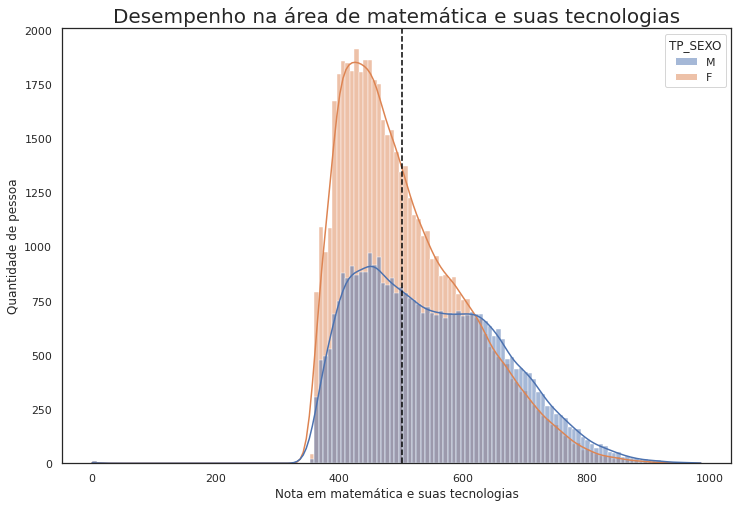

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT", hue="TP_SEXO", kde=True).set(title = "",  xlabel = "Nota em matemática e suas tecnologias",ylabel = "Quantidade de pessoa")
plt.title(label = "Desempenho na área de matemática e suas tecnologias", fontsize = 20)
plt.axvline(dados["NU_NOTA_MT"].median(), color='black', linestyle='dashed', linewidth=1.5)
sns.set_theme(style="white")

É possível notar que a maior parte dos candidatos do gênero feminino ficou abaixo das 50% melhores notas. Quando se compara a mediana por gênero, é possível notar que há uma diferença de quase 50 pontos entre os gêneros.

Seria este resultado de um desinteresse por parte das candidatas ao longo do aprendizado nos últimos anos do ensino?

E enquanto a maior parte das mulheres está abaixo dos 50% das notas, os candidatos do gênero masculino tem uma distribuição mais homogênea.

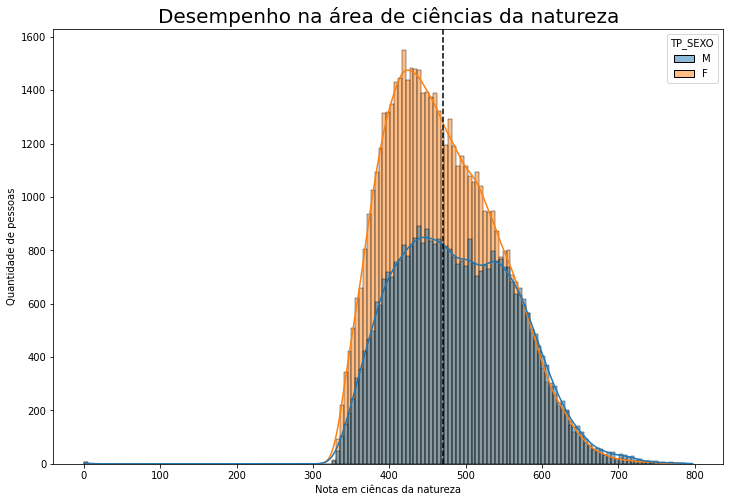

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_CN", hue="TP_SEXO", kde=True).set(title = "", xlabel = "Nota em ciêncas da natureza", ylabel = "Quantidade de pessoas")
plt.title(label = "Desempenho na área de ciências da natureza", fontsize = 20)
plt.axvline(dados["NU_NOTA_CN"].median(), color='black', linestyle='dashed', linewidth=1.5)

Em ciências da natureza o padrão de matématica se repete, com ainda a maior parte das candidatas abaixo dos 50%. Mas mais próximas desta linha do que em matemática. Tanto que a diferença entre os gêneros fica em apenas 20 pontos. A distruibuição do gênero masculino ainda é mais homogêna que a do feminino.

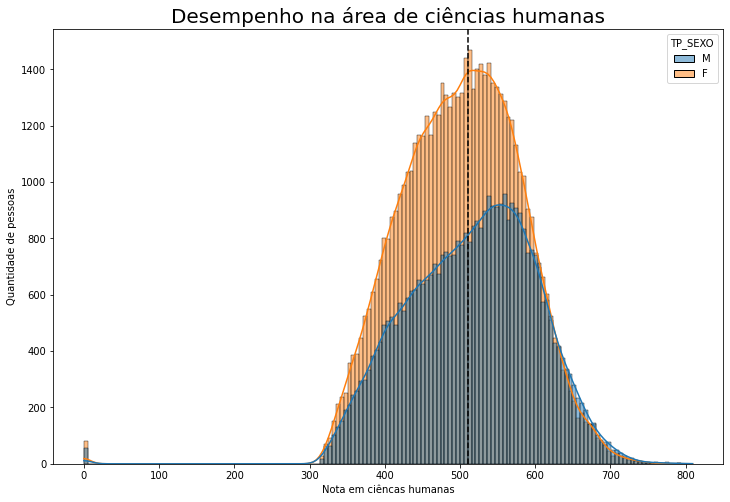

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_CH", hue="TP_SEXO", kde=True).set(title = "", xlabel = "Nota em ciêncas humanas", ylabel = "Quantidade de pessoas")
plt.title(label = "Desempenho na área de ciências humanas", fontsize = 20)
plt.axvline(dados["NU_NOTA_CH"].median(), color='black', linestyle='dashed', linewidth=1.5)

Já nas ciências humanas os dois gêneros tem distribuições muito similares. Embora ainda se mantenha a diferença de 20 pontos entre as medianas.



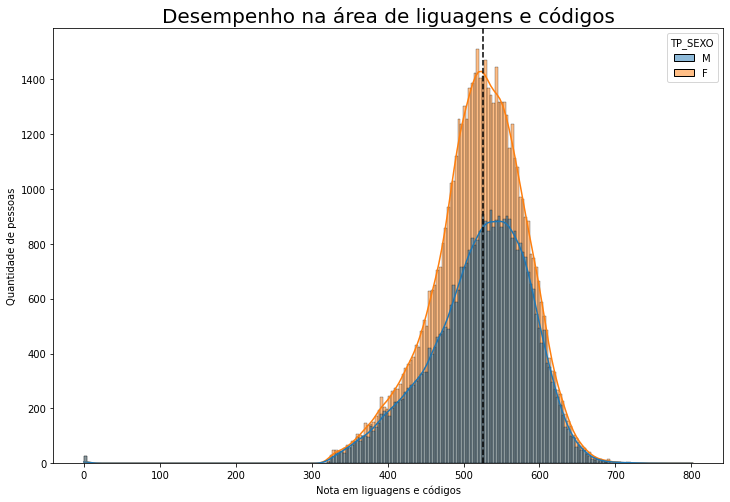

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC", hue="TP_SEXO", kde=True).set(title = "", xlabel = "Nota em liguagens e códigos", ylabel = "Quantidade de pessoas")
plt.title(label = "Desempenho na área de liguagens e códigos", fontsize = 20)
plt.axvline(dados["NU_NOTA_LC"].median(), color='black', linestyle='dashed', linewidth=1.5)

Já em Linguagens e códigos, a distribuição do gênero masculino ainda é mais homogêna que a do feminino. Mas a distribuição do gênero feminino se encontra bem próxima da mediana geral, tanto acima quanto abaixo.

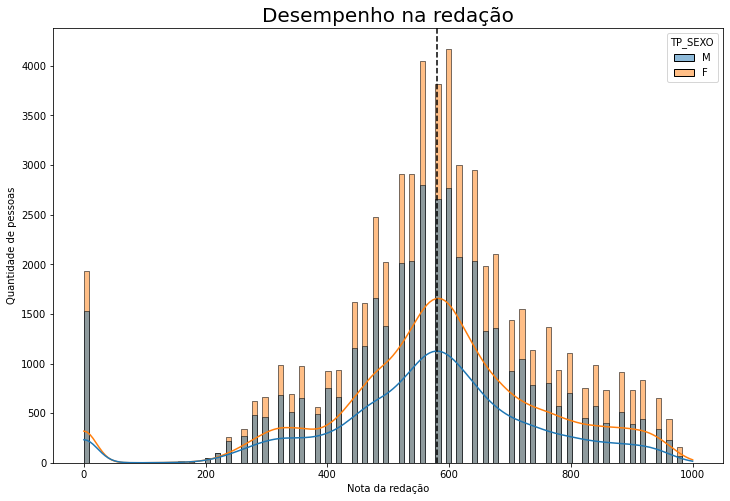

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_REDACAO", hue="TP_SEXO", kde=True).set(title = "", xlabel = "Nota da redação", ylabel = "Quantidade de pessoas")
plt.title(label = "Desempenho na redação", fontsize = 20)
plt.axvline(dados["NU_NOTA_REDACAO"].median(), color='black', linestyle='dashed', linewidth=1.5)

E por fim, a nota das redações foi bem interessante. Em primeiro lugar porque as medianas são iguais. E em segundo lugar porque os dados não são contínuos, como se pode perceber no gráfico. Tem valores de acumulados de notas, sem valores entre. Acho que pode ser pela maneira que são atribuidas as notas, que são analisadas em 4 ou 5 competências. Assim, não há diferenças relevantes entre gênero nestas notas.

Só como um complemento, achei relevante determinar quantas mulheres e quantos homens prestaram a prova. Para entender melhor os gráficos.

In [ ]:
#quantitativo de candidatos por gênero

genero_M = dados.query("TP_SEXO == 'M'")
genero_F = dados.query("TP_SEXO == 'F'")

print(len(genero_M), "Homens") 
print(len(genero_F), "Mulheres")

mulheres_sem_zero = dados_sem_notas_zero.query("TP_SEXO == 'F'")
homens_sem_zero = dados_sem_notas_zero.query("TP_SEXO == 'M'")

print(len(homens_sem_zero), "homens não zeraram")
print(len(mulheres_sem_zero), "mulheres não zeraram")


51497 Homens
75883 Mulheres
39670 homens não zeraram
58548 mulheres não zeraram


##Conclusões


Então, gostaria de deixar claro que algumas concluões podem não ser verdadeiras, pois esta análise foi realizada sobre uma amostra, e com isso pode haver alguma distorção realizada pelo próprio processo de amostragem.


Assim, posso concluir que renda impacta diretamente nas notas dos candidatos. Candidatos que tem renda familiar mais alta vão melhor.

Candidatos que tem pais ou responsáveis em seu grupo familiar com mais anos de estudo também vão melhor na prova. 75% das notas de quem tem pais ou responsáveis com graduação ou pós, é maior ou igual a quem os responsáveis não tem estudo ou não sabem informar.
Portanto, me sinto segura em afirmar que este fator impacta no desempenho.

Nos outros aspectos socio-econômicos que investiguei encontrei informações que corroboram o impacto da renda no desempenho. No caso da quantidade de quartos, como não filtrei número de moradores combinado com quantos moradores tem na casa, não me sinto segura de afirmar categoricamente que os dados que olhei reproduzem a realidade da renda da amostra. 

A comparação entre quem tem 4 ou mais quartos e quem não tem é possível, porém o tamanho da amostra de um grupo é 6 vezes maoir que a do outro.

E por fim, na questão de gênero, pude sim encontrar diferença relevante no desempenho das canditatas com relação aos candidatos, principalmente na área de exatas. Quem se declarou como do sexo feminino teve um desempenho inferior ao masculino, mais evidente na prova de matemática e suas tecnologias.

Fico pensando se o baixo índice de alunas mulher nos cursos de exatas seja um reflexo claro do vestibular. Ficarei na dúvida até que alguém realize um estudo extenso sobre entrada de alunas no curso e desempenho no vestibular.

Mas nas áreas "de humanas", os desempenhos se equiparam, e nos cursos "de humanas", acabamos encontrando mais mulheres.





